In [115]:
from pathlib import Path
import numpy as np
# cfg should save and preset the proper criteria.
from cfg import (winSize, zeroZone, criteria, pattern_size)
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [116]:
class CornersNotFound(Exception):
    pass

In [117]:
def findCorners(image, pattern_size, winSize, zeroZone, criteria):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    found, corners = cv2.findChessboardCorners(gray, pattern_size)
    
    if found:
        return(cv2.cornerSubPix(gray, corners, winSize, zeroZone, criteria))
    else:
        raise CornersNotFound("CornersNotFound")

In [118]:
image_path = '/home/jsk/GitHub/cv2stuff/data/images/left01.jpg'
#image_path = '/home/jsk/GitHub/cv2stuff/data/images/left.jpg'

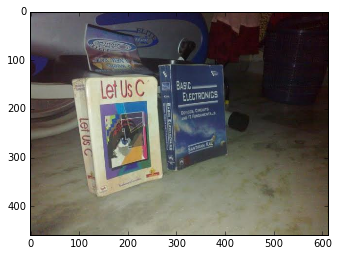

In [119]:
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

In [120]:
try:
    corners = findCorners(image_rgb, pattern_size, winSize, zeroZone, criteria)
except CornersNotFound:
    corners = []

In [121]:
cv2.drawChessboardCorners(image_rgb, pattern_size, corners, True)
plt.imshow(image_rgb)

TypeError: corners is not a numpy array, neither a scalar

In [ ]:
height, width = image_rgb.shape[:2]
height, width

In [ ]:
images_path = Path('/home/jsk/GitHub/cv2stuff/data/images')
images_paths = set(images_path.glob('left*[0-9].jpg'))

In [ ]:
corners_reshape = (-1, 2)
corners_new = corners.reshape(-1, 2)

In [ ]:
corners.shape

In [ ]:
corners_new.shape

In [ ]:
corners[0,0,0]

In [ ]:
corners.dtype